In [ ]:
def Newton_method(x0,n, f,df):
    x=x0
    x_vals=[x]
    for _ in range(n):
        x=x-f(x)/df(x)
        x_vals.append(x)
    return x_vals

def f(x):
    return x**3-12

def df(x):
    return 3*x**2


    

In [ ]:
x=2.5
n=10
Newton_method(x,n, f=f, df=df)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

no_students=30
np.random.seed(50)

hours_studied=np.random.randint(0, 10, no_students)
exam_scores=np.random.randint(0, 100, no_students)

plt.figure(figsize=(10, 6))
plt.scatter(hours_studied, exam_scores)
plt.title("Exam Scores vs Hours Studied")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Scores")
plt.show()


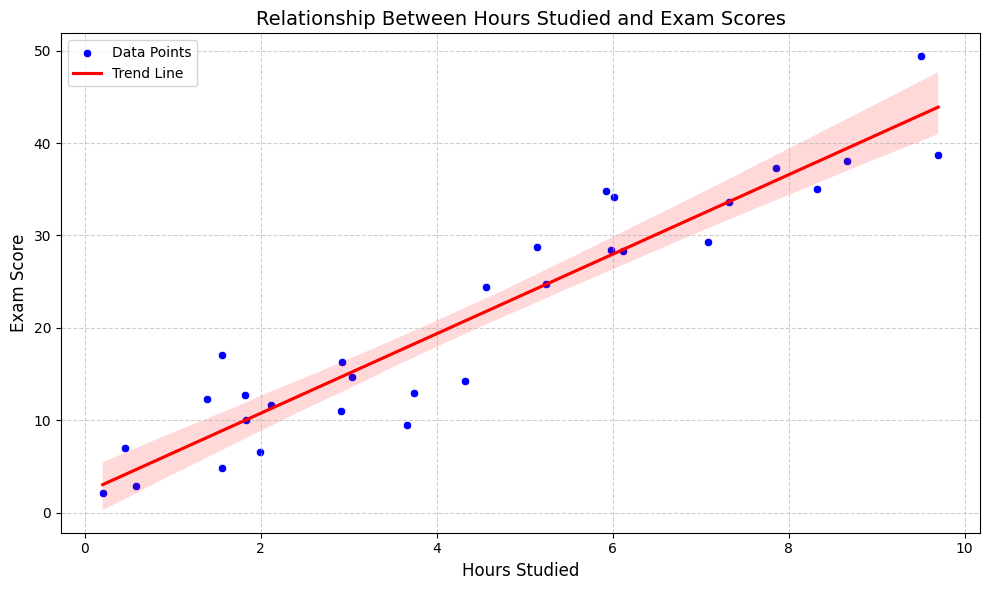

Dataset:
   Hours Studied  Exam Score
0       3.745401   12.972038
1       9.507143   49.414205
2       7.319939   33.596504
3       5.986585   28.474455
4       1.560186    4.792399


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Set random seed for reproducibility
np.random.seed(42)

# Step 2: Generate the dataset
num_students = 30
hours_studied = np.random.uniform(0, 10, num_students)  # Random hours studied (0 to 10)
exam_scores = 5 * hours_studied + np.random.normal(0, 5, num_students)  # Linear relationship with noise

# Create a DataFrame
data = pd.DataFrame({
    'Hours Studied': hours_studied,
    'Exam Score': exam_scores
})

# Step 3: Visualize the data
plt.figure(figsize=(10, 6))

# Scatter plot of data points
sns.scatterplot(x='Hours Studied', y='Exam Score', data=data, color='blue', label='Data Points')

# Line graph showing the trend
sns.regplot(x='Hours Studied', y='Exam Score', data=data, scatter=False, color='red', label='Trend Line')

# Add labels and title
plt.title('Relationship Between Hours Studied and Exam Scores', fontsize=14)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

# Display the first few rows of the dataset
print("Dataset:")
print(data.head())

x = 0.00, y = 1.0000
x = 0.10, y = 1.0100
x = 0.20, y = 1.0400
x = 0.30, y = 1.0900
x = 0.40, y = 1.1600
x = 0.50, y = 1.2500
x = 0.60, y = 1.3600
x = 0.70, y = 1.4900
x = 0.80, y = 1.6400
x = 0.90, y = 1.8100
x = 1.00, y = 2.0000


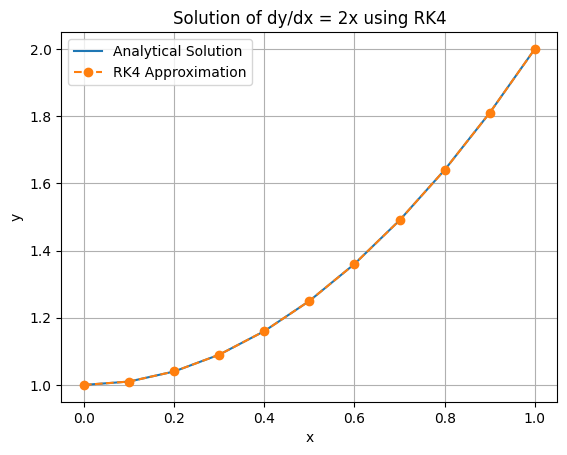

In [12]:
def rk4_solver(f, x0, y0, h, num_steps):
    """
    Solves a first-order ODE dy/dx = f(x, y) using the fourth-order Runge-Kutta method.

    Args:
        f (callable): The function representing the ODE (takes x and y as arguments).
        x0 (float): The initial value of x.
        y0 (float): The initial value of y at x0.
        h (float): The step size.
        num_steps (int): The number of steps to take.

    Returns:
        list: A list of tuples, where each tuple contains (x_value, y_value).
    """
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0

    for _ in range(num_steps):
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)

        y = y + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        x = x + h
        x_values.append(x)
        y_values.append(y)

    return list(zip(x_values, y_values))

# Define the ODE dy/dx = 2x
def dydx(x, y):
    return 2 * x

# Set initial conditions and parameters
initial_x = 0
initial_y = 1  # You can change the initial y value
step_size = 0.1
number_of_steps = 10

# Solve the ODE using RK4
solution = rk4_solver(dydx, initial_x, initial_y, step_size, number_of_steps)

# Print the results
for x, y in solution:
    print(f"x = {x:.2f}, y = {y:.4f}")

# You can also compare with the analytical solution: y(x) = x^2 + C
# With y(0) = 1, C = 1, so y(x) = x^2 + 1
import matplotlib.pyplot as plt
analytical_x = [initial_x + i * step_size for i in range(number_of_steps + 1)]
analytical_y = [x**2 + initial_y for x in analytical_x]

rk4_x, rk4_y = zip(*solution)

plt.plot(analytical_x, analytical_y, label='Analytical Solution')
plt.plot(rk4_x, rk4_y, marker='o', linestyle='--', label='RK4 Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of dy/dx = 2x using RK4')
plt.legend()
plt.grid(True)
plt.show()